# COGS 108 - Final Project (Pt. 2) - Data Checkpoint

# Team Members

- Jimmy Ngo
- Nick Schaefer
- Zach Bigelow
- E.J. Yu
- Patrick Wang

<a id='research_question'></a>
# Research Question

**Main Research Question:** What macroeconomic factors should a homebuyer consider in order for them to successfully buy a house at a good price?
* **Sub-Question:** Is there a correlation between house prices and the nationwide housing supply?
* **Sub-Question:** Is there a correlation between house prices and Gross Domestic Product [GDP] growth rates?
* **Sub-Question:** Is there a correlation between house prices and Federal Funds Rate?

**Note:** The answers to the sub-questions will help us answer the main research question.

# Setup

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm

In [2]:
# Gather necessary datasets to use
df_pricesOverYears=pd.read_csv('https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=MSPUS&scale=left&cosd=1963-01-01&coed=2021-10-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Quarterly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2022-02-11&revision_date=2022-02-11&nd=1963-01-01')
df_houseSupplyOverYears=pd.read_csv('https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=MSACSR&scale=left&cosd=1963-01-01&coed=2021-12-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Quarterly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2022-02-11&revision_date=2022-02-11&nd=1963-01-01')
df_GDP_Growth=pd.read_csv('https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=GDPC1_GDPPOT&scale=left&cosd=1949-01-01&coed=2021-10-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=1&lw=2&ost=-99999&oet=99999&mma=0&fml=100%2A%28a-b%29%2Fb&fq=Quarterly&fam=avg&fgst=lin&fgsnd=2009-06-01&line_index=1&transformation=lin_lin&vintage_date=2022-02-11_2022-02-11&revision_date=2022-02-11_2022-02-11&nd=1947-01-01_1949-01-01')
df_Fed_Funds_Rate = pd.read_csv('https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=FEDFUNDS&scale=left&cosd=1963-01-01&coed=2021-10-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Quarterly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2022-02-23&revision_date=2022-02-23&nd=1954-07-01')

# Data Cleaning

After importing our datasets, there were a handful of things that we needed to do in order to make the data we're working with (1) much more human-readable and (2) easier to work with for our purposes:

In [3]:
# Check to see what df_pricesOverYears looks like in its raw state
df_pricesOverYears

,DATE,MSPUS
0,1963-01-01,17800.0
1,1963-04-01,18000.0
2,1963-07-01,17900.0
3,1963-10-01,18500.0
4,1964-01-01,18500.0
...,...,...
231,2020-10-01,358700.0
232,2021-01-01,369800.0
233,2021-04-01,382600.0
234,2021-07-01,411200.0


In [4]:
# Check to see what df_houseSupplyOverYears looks like in its raw state
df_houseSupplyOverYears

,DATE,MSACSR
0,1963-01-01,5.900000
1,1963-04-01,5.466667
2,1963-07-01,5.200000
3,1963-10-01,5.833333
4,1964-01-01,5.700000
...,...,...
231,2020-10-01,3.800000
232,2021-01-01,4.433333
233,2021-04-01,5.366667
234,2021-07-01,6.066667


In [5]:
# Check to see what df_GDP_Growth looks like in its raw state
df_GDP_Growth

,DATE,GDPC1_GDPPOT
0,1949-01-01,0.131437
1,1949-04-01,-1.501175
2,1949-07-01,-1.810712
3,1949-10-01,-3.859536
4,1950-01-01,-1.396630
...,...,...
287,2020-10-01,-2.030105
288,2021-01-01,-1.242469
289,2021-04-01,-0.216935
290,2021-07-01,0.102728


In [6]:
df_Fed_Funds_Rate

,DATE,FEDFUNDS
0,1963-01-01,2.966667
1,1963-04-01,2.963333
2,1963-07-01,3.330000
3,1963-10-01,3.453333
4,1964-01-01,3.463333
...,...,...
231,2020-10-01,0.090000
232,2021-01-01,0.080000
233,2021-04-01,0.070000
234,2021-07-01,0.090000


**Step 1:** We broke up the `DATE` columns into two rows: `Year` and `Month` (in that order, from left to right). And then we deleted the old `DATE` column (with the YYYY-MM-DD format) because we will be using the two columns corresponding to month and year. We did not make a column for `Day` because all of our data has a day of the first of every month (so, Day = 1), so we can always assume that for the entirety of this project. Also, all of the information about the dates are to the left of the actual numerical data on our tables.

In [7]:
# Separated the date column into 2 different columns: year and month for the house prices over years
df_pricesOverYears['YEAR'] = pd.to_datetime(df_pricesOverYears['DATE']).dt.year
df_pricesOverYears['MONTH'] = pd.to_datetime(df_pricesOverYears['DATE']).dt.month
df_pricesOverYears = df_pricesOverYears.drop(labels= 'DATE', axis = 1)

# Separated the date column into 2 different columns: year and month for house supply over years
df_houseSupplyOverYears['YEAR'] = pd.to_datetime(df_houseSupplyOverYears['DATE']).dt.year
df_houseSupplyOverYears['MONTH'] = pd.to_datetime(df_houseSupplyOverYears['DATE']).dt.month
df_houseSupplyOverYears = df_houseSupplyOverYears.drop(labels = 'DATE', axis =1)

# Separated the date column into 2 different columns: year and month for GDP growth
df_GDP_Growth['YEAR'] = pd.to_datetime(df_GDP_Growth['DATE']).dt.year
df_GDP_Growth['MONTH'] = pd.to_datetime(df_GDP_Growth['DATE']).dt.month
df_GDP_Growth = df_GDP_Growth.drop(labels = 'DATE', axis = 1)

# Separated the date column into 2 different columns: year and month for Federal Funds Rate
df_Fed_Funds_Rate['YEAR'] = pd.to_datetime(df_Fed_Funds_Rate['DATE']).dt.year
df_Fed_Funds_Rate['MONTH'] = pd.to_datetime(df_Fed_Funds_Rate['DATE']).dt.month
df_Fed_Funds_Rate = df_Fed_Funds_Rate.drop(labels = 'DATE', axis = 1)

In [8]:
# Reorder the columns so that year and month are in the first and second columns
df_GDP_Growth = df_GDP_Growth[['YEAR','MONTH','GDPC1_GDPPOT']]
df_houseSupplyOverYears = df_houseSupplyOverYears[['YEAR','MONTH','MSACSR']]
df_pricesOverYears = df_pricesOverYears[['YEAR','MONTH','MSPUS']]
df_Fed_Funds_Rate = df_Fed_Funds_Rate[['YEAR','MONTH','FEDFUNDS']]

In [9]:
df_pricesOverYears

,YEAR,MONTH,MSPUS
0,1963,1,17800.0
1,1963,4,18000.0
2,1963,7,17900.0
3,1963,10,18500.0
4,1964,1,18500.0
...,...,...,...
231,2020,10,358700.0
232,2021,1,369800.0
233,2021,4,382600.0
234,2021,7,411200.0


In [10]:
# Check for missing values
df_pricesOverYears.any().isna().sum()

0

In [11]:
df_houseSupplyOverYears

,YEAR,MONTH,MSACSR
0,1963,1,5.900000
1,1963,4,5.466667
2,1963,7,5.200000
3,1963,10,5.833333
4,1964,1,5.700000
...,...,...,...
231,2020,10,3.800000
232,2021,1,4.433333
233,2021,4,5.366667
234,2021,7,6.066667


In [12]:
# Check for missing values
df_houseSupplyOverYears.any().isna().sum()

0

In [13]:
df_GDP_Growth

,YEAR,MONTH,GDPC1_GDPPOT
0,1949,1,0.131437
1,1949,4,-1.501175
2,1949,7,-1.810712
3,1949,10,-3.859536
4,1950,1,-1.396630
...,...,...,...
287,2020,10,-2.030105
288,2021,1,-1.242469
289,2021,4,-0.216935
290,2021,7,0.102728


In [14]:
# Check for missing values
df_GDP_Growth.any().isna().sum()

0

In [15]:
df_Fed_Funds_Rate

,YEAR,MONTH,FEDFUNDS
0,1963,1,2.966667
1,1963,4,2.963333
2,1963,7,3.330000
3,1963,10,3.453333
4,1964,1,3.463333
...,...,...,...
231,2020,10,0.090000
232,2021,1,0.080000
233,2021,4,0.070000
234,2021,7,0.090000


In [16]:
# Check for missing values
df_Fed_Funds_Rate.any().isna().sum()

0

**Step 2:** The GDP Growth Rate dataset had a range that was larger than our target range. We trimmed this dataset to fit our range, between the years 1963 and 2021, and then we conformed the remaining data to our existing data rows for Sales Price and the House Supply ratio. Also reset the index for GDP after dropping dates outside our range.

In [17]:
df_GDP_Growth = df_GDP_Growth.iloc[56:].reset_index().drop(labels = 'index', axis = 1)

**Step 3:** We renamed the column `MSPUS` to something much more human-readable: `Median Sales Price of Sold Houses`.

In [18]:
df_pricesOverYears.columns = ['Year','Month','Median Sales Price of Sold Houses']

**Step 4:** We renamed the column `MSACSR` to something much more human-readable: `Ratio: Houses for Sale to Houses Sold`.

In [19]:
df_houseSupplyOverYears.columns = ['Year','Month','Ratio: Houses for Sale to Houses Sold']

**Step 5:** We renamed the column `GDPC1_GDPPOT` to something much more human-readable: `GDP Growth Rate`.

In [20]:
df_GDP_Growth.columns = ['Year','Month','GDP Growth Rate']

**Step 6:** We renamed the column `FEDFUNDS` to something much more human-readable: `Federal Funds Rate`.

In [21]:
df_Fed_Funds_Rate.columns = ['Year','Month','Federal Funds Rate']

**Step 7:** After doing the above four, we combined the information from the three datasets into a single table so that it is easier to manipulate. Created `df_AllCombined`, copying the, month, and data columns from our other data sets to create a fully descriptive dataframe with all of the data we are working with.

In [22]:
# Created a new dataframe to hold all of our data and added the necessary columns one by one to it
df_AllCombined = pd.DataFrame()
df_AllCombined['Year'] = df_GDP_Growth['Year']
df_AllCombined['Month'] = df_GDP_Growth['Month']
df_AllCombined['Median Sales Price of Sold Houses'] = df_pricesOverYears['Median Sales Price of Sold Houses']
df_AllCombined['Ratio: Houses for Sale to Houses Sold'] = df_houseSupplyOverYears['Ratio: Houses for Sale to Houses Sold']
df_AllCombined['GDP Growth Rate'] = df_GDP_Growth['GDP Growth Rate']
df_AllCombined['Federal Funds Rate'] = df_Fed_Funds_Rate['Federal Funds Rate']
df_AllCombined

,Year,Month,Median Sales Price of Sold Houses,Ratio: Houses for Sale to Houses Sold,GDP Growth Rate,Federal Funds Rate
0,1963,1,17800.0,5.900000,-1.018702,2.966667
1,1963,4,18000.0,5.466667,-0.984798,2.963333
2,1963,7,17900.0,5.200000,0.119071,3.330000
3,1963,10,18500.0,5.833333,-0.293823,3.453333
4,1964,1,18500.0,5.700000,0.733058,3.463333
...,...,...,...,...,...,...
231,2020,10,358700.0,3.800000,-2.030105,0.090000
232,2021,1,369800.0,4.433333,-1.242469,0.080000
233,2021,4,382600.0,5.366667,-0.216935,0.070000
234,2021,7,411200.0,6.066667,0.102728,0.090000


# Data Analysis & Results (EDA)

**Step 1:** Check one more time for any missing values in the dataset.

In [23]:
# Check one more time for missing values
df_AllCombined.any().isna().sum()

0

**Step 2:** Use `describe` to have a general idea of what our dataset is like.

In [24]:
df_AllCombined.describe()

,Year,Month,Median Sales Price of Sold Houses,Ratio: Houses for Sale to Houses Sold,GDP Growth Rate,Federal Funds Rate
count,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000
mean,1992.000000,5.500000,142766.949153,6.033475,-0.695260,4.953037
std,17.065581,3.361231,101920.433760,1.592392,2.349514,3.741132
min,1963.000000,1.000000,17800.000000,3.366667,-9.153023,0.060000
25%,1977.000000,3.250000,50925.000000,5.000000,-2.032155,1.880000
50%,1992.000000,5.500000,124900.000000,5.783333,-0.690348,4.866667
75%,2007.000000,7.750000,224150.000000,6.766667,0.787205,6.719167
max,2021.000000,10.000000,423600.000000,11.400000,5.655573,17.780000


**Step 3:** Plot each variable in a line plot by year to see trends. The following code will show us a plot of the Federal Funds Rate over the years. We want to see if that trend holds for our following graphs.

<Axes: xlabel='Year', ylabel='Federal Funds Rate'>

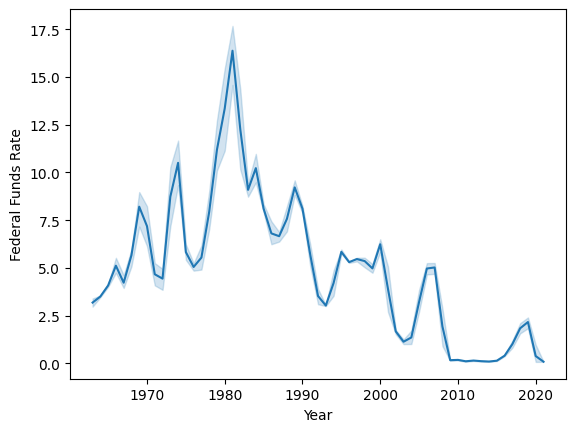

In [25]:
sns.lineplot(data = df_AllCombined, x = "Year", y= "Federal Funds Rate")

Here, we plotted the different hues set by quarter (Months 1, 4, 7, and 10) so we can see if there was a difference within winter, spring, summer, and fall months.

<Axes: xlabel='Year', ylabel='Federal Funds Rate'>

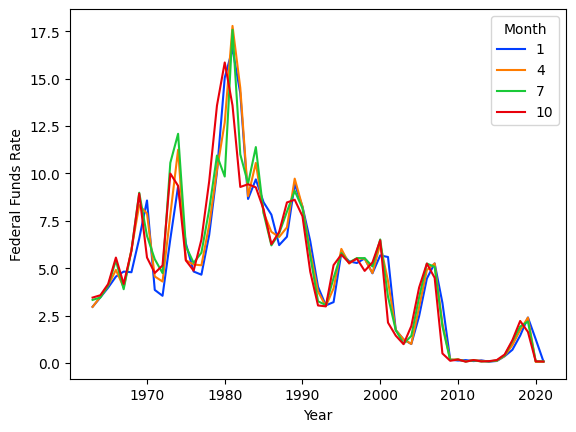

In [26]:
sns.lineplot(data = df_AllCombined, x = "Year", y= "Federal Funds Rate", hue = 'Month', palette = 'bright')

We decided view our data's GDP Growth Rate as well and plotted its growth / decline over the years.

<Axes: xlabel='Year', ylabel='GDP Growth Rate'>

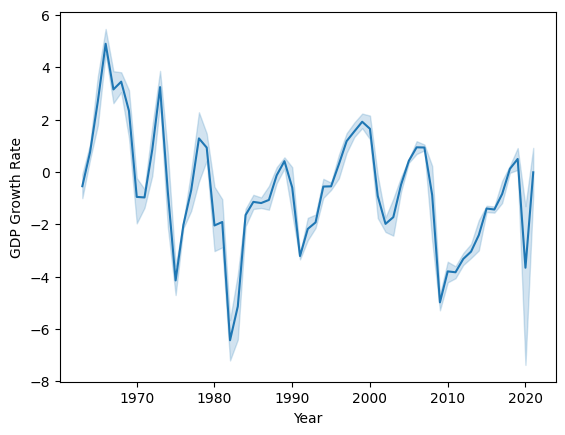

In [27]:
sns.lineplot(data = df_AllCombined, x = "Year", y= "GDP Growth Rate")

We separated the GDP Growth Rate into different hues set by quarter (Months 1, 4, 7, and 10) in our lineplot to display any noticible differences between the months.

<Axes: xlabel='Year', ylabel='GDP Growth Rate'>

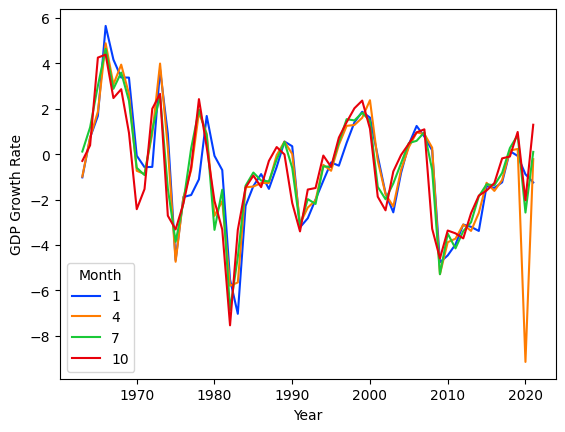

In [28]:
sns.lineplot(data = df_AllCombined, x = "Year", y= "GDP Growth Rate", hue = 'Month', palette= 'bright')

This lineplot displays the ratio of houses for sale during the year and houses that were actually sold. We wanted to see which years had a lot of houses for sale but that weren't sold. The spikes should show the bad years for the housing market.

<Axes: xlabel='Year', ylabel='Ratio: Houses for Sale to Houses Sold'>

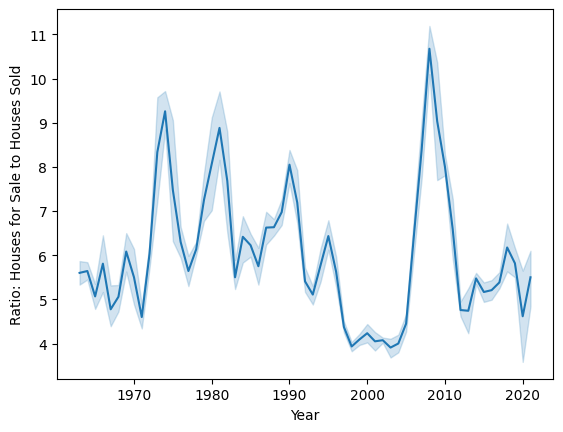

In [29]:
sns.lineplot(data = df_AllCombined, x = "Year", y= "Ratio: Houses for Sale to Houses Sold")

Similarly to previous plots, we also examine if there were any specific trends affected by the time of year it was so we separate the lines into months.

<Axes: xlabel='Year', ylabel='Ratio: Houses for Sale to Houses Sold'>

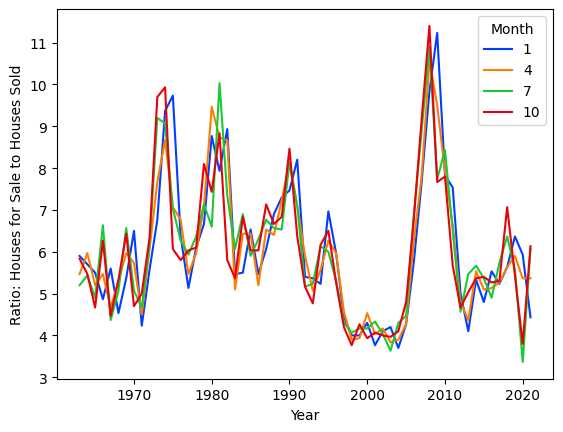

In [30]:
sns.lineplot(data = df_AllCombined, x = "Year", y= "Ratio: Houses for Sale to Houses Sold", hue = 'Month', palette = 'bright')

This lineplot is essential in determining how the average housing price has increased or decreased over the past 50 years.

<Axes: xlabel='Year', ylabel='Median Sales Price of Sold Houses'>

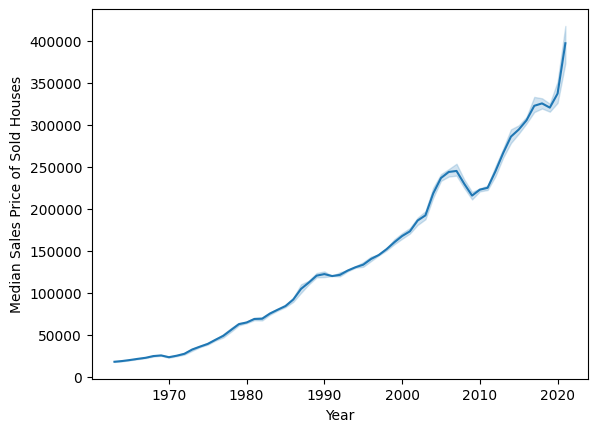

In [31]:
sns.lineplot(data = df_AllCombined, x = "Year", y= "Median Sales Price of Sold Houses")

Similarly, we look to see if the housing prices vary by month using hue.

<Axes: xlabel='Year', ylabel='Median Sales Price of Sold Houses'>

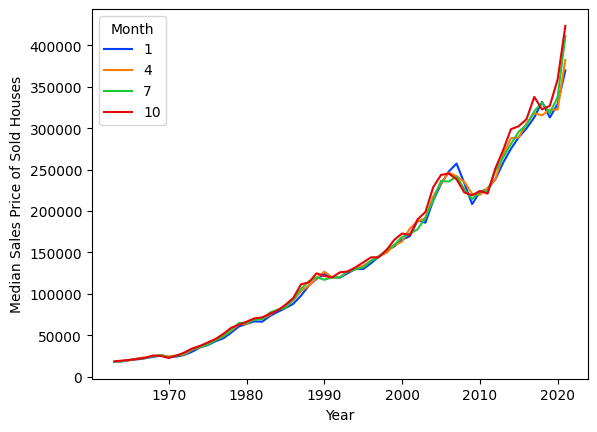

In [32]:
sns.lineplot(data = df_AllCombined, x = "Year", y= "Median Sales Price of Sold Houses", hue = 'Month', palette = 'bright')

**Step 4:** Plot the data in a scatter plot to see possible outliers. This scatter plot was made to plot all our data points and the sales prices they had that year.

<Axes: xlabel='Year', ylabel='Median Sales Price of Sold Houses'>

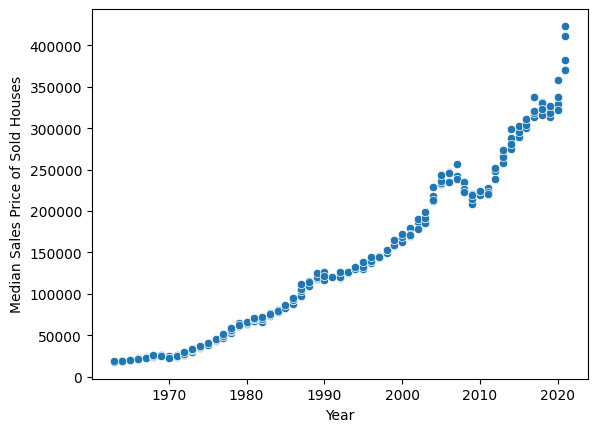

In [33]:
sns.scatterplot(x='Year', y='Median Sales Price of Sold Houses', data=df_AllCombined)

This scatterplot was made to display all the datapoints of the Ratio of houses for sale and houses sold. A scatterplot would better display clusters of data.

<Axes: xlabel='Year', ylabel='Ratio: Houses for Sale to Houses Sold'>

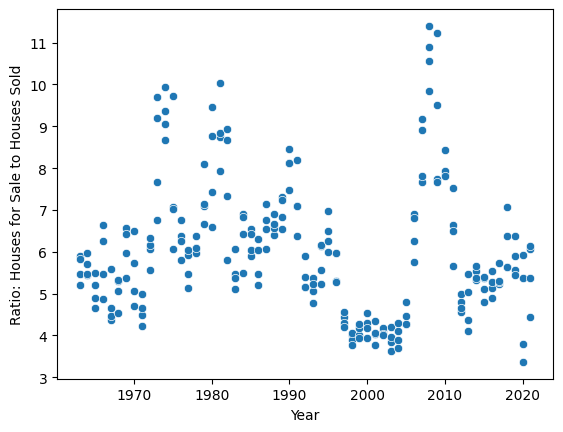

In [34]:
sns.scatterplot(x='Year', y='Ratio: Houses for Sale to Houses Sold', data=df_AllCombined)

We made this scatterplot to display our datapoints' growth rate. It will show us how much the gdp generally moved from year to year by examining the clusters.

<Axes: xlabel='Year', ylabel='GDP Growth Rate'>

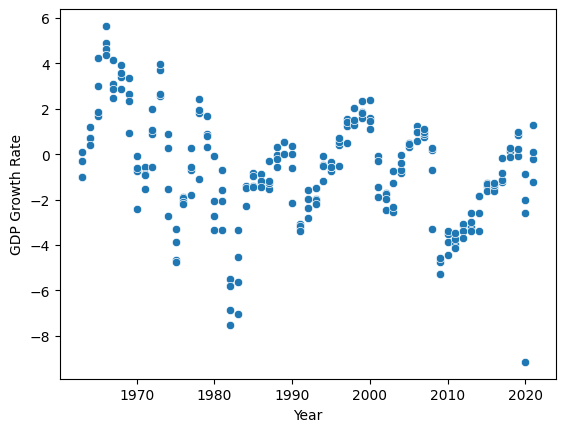

In [35]:
sns.scatterplot(x='Year', y='GDP Growth Rate', data=df_AllCombined)

This scatterplot was made to display our datapoints for Federal Funds rate over the years. This will provide use with more information than just a line plot. We can see better see if the funds stayed at a certain point for a long period of time or only reached certain rates briefly over the years.

<Axes: xlabel='Year', ylabel='Federal Funds Rate'>

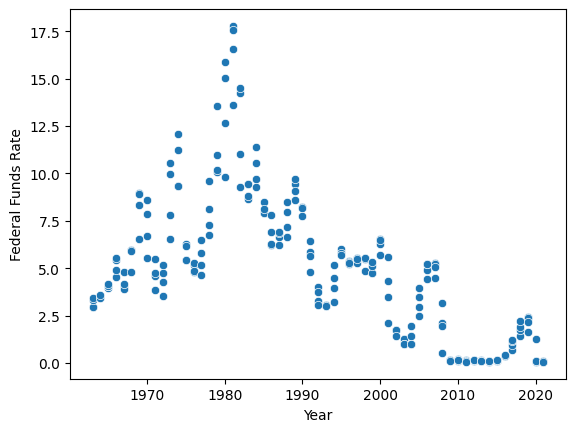

In [36]:
sns.scatterplot(x='Year', y='Federal Funds Rate', data=df_AllCombined)

This will show us the median sales prices of houses sold compared the federal funds rate. By use a scatterplot we hope to see if there is any relationship or trend between the two variables.

<Axes: xlabel='Federal Funds Rate', ylabel='Median Sales Price of Sold Houses'>

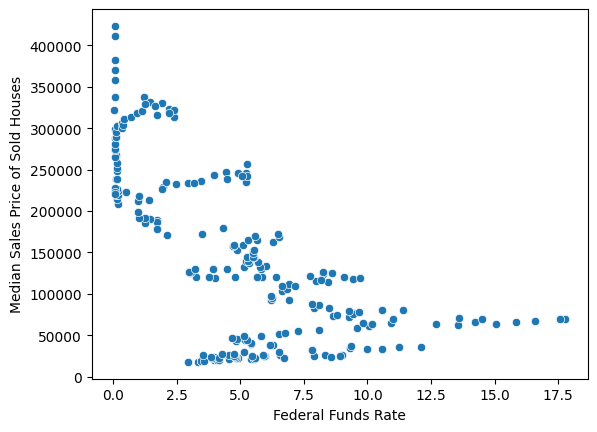

In [37]:
sns.scatterplot(x='Federal Funds Rate', y='Median Sales Price of Sold Houses', data=df_AllCombined)

This scatterplot displays the relationship between the Ratio of Houses for Sale and Sold to the Median Sales Price of Sold houses. We want to see if there is a relationship / trend in that if the price rises or drops as there are more houses avalible that are not being bought.

<Axes: xlabel='Ratio: Houses for Sale to Houses Sold', ylabel='Median Sales Price of Sold Houses'>

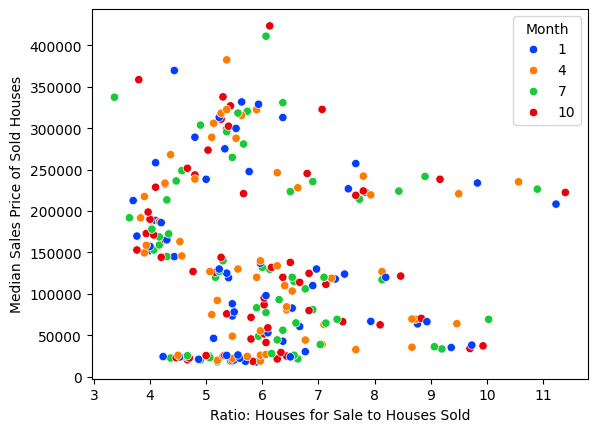

In [38]:
sns.scatterplot(x='Ratio: Houses for Sale to Houses Sold', y='Median Sales Price of Sold Houses', data=df_AllCombined, hue='Month', palette = 'bright')

This scatterplot displays the relationship between the GDP Growth Rate and Median Sales Price of Sold houses.

<Axes: xlabel='GDP Growth Rate', ylabel='Median Sales Price of Sold Houses'>

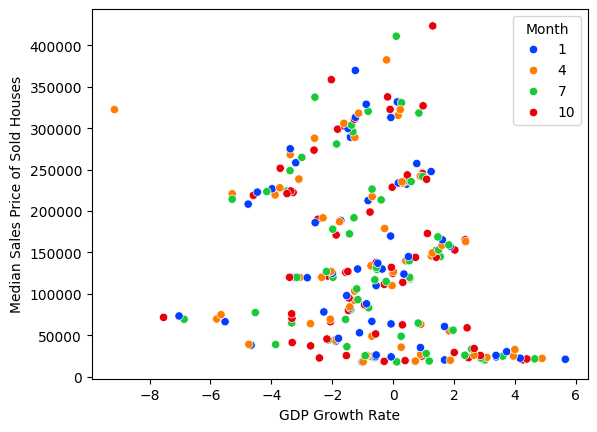

In [39]:
sns.scatterplot(x='GDP Growth Rate', y='Median Sales Price of Sold Houses', data=df_AllCombined, hue='Month', palette = 'bright')

**Step 5:** Do a linear regression to explore relationship between median home price and other variables.

In [40]:
# Regress the ratio of houses for sale to houses sold on the median sales price of sold houses
reg_df = df_AllCombined[['Median Sales Price of Sold Houses', 'Ratio: Houses for Sale to Houses Sold']]
reg_df.columns = ['price', 'inventory']
outcome, predictors = patsy.dmatrices('price ~ inventory', reg_df)

mod_log = sm.OLS(outcome,predictors)
res_log = mod_log.fit()
print(res_log.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     5.189
Date:                Wed, 24 Apr 2024   Prob (F-statistic):             0.0236
Time:                        04:52:25   Log-Likelihood:                -3053.3
No. Observations:                 236   AIC:                             6111.
Df Residuals:                     234   BIC:                             6118.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.996e+05   2.58e+04      7.732      0.0

In [41]:
# Regress the federal funds rate on the median sales price of sold houses
reg_df2 = df_AllCombined[['Median Sales Price of Sold Houses', 'Federal Funds Rate']]
reg_df2.columns = ['price', 'funds']
outcome, predictors = patsy.dmatrices('price ~ funds', reg_df2)

mod_log = sm.OLS(outcome,predictors)
res_log = mod_log.fit()
print(res_log.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     166.8
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           3.68e-29
Time:                        04:52:25   Log-Likelihood:                -2992.4
No. Observations:                 236   AIC:                             5989.
Df Residuals:                     234   BIC:                             5996.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.298e+05   8440.663     27.226      0.0

In [42]:
# Regress the GDP growth rate on the median sales price of sold houses
reg_df3 = df_AllCombined[['Median Sales Price of Sold Houses', 'GDP Growth Rate']]
reg_df3.columns = ['price', 'gdp']
outcome, predictors = patsy.dmatrices('price ~ gdp', reg_df3)

mod_log = sm.OLS(outcome,predictors)
res_log = mod_log.fit()
print(res_log.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     13.19
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           0.000345
Time:                        04:52:25   Log-Likelihood:                -3049.4
No. Observations:                 236   AIC:                             6103.
Df Residuals:                     234   BIC:                             6110.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.358e+05   6747.195     20.127      0.0

In [43]:
# Regress the GDP growth rate on the median sales price of sold houses
reg_df4 = df_AllCombined[['Median Sales Price of Sold Houses', 'Year']]
reg_df4.columns = ['price', 'year']
outcome, predictors = patsy.dmatrices('price ~ year', reg_df4)

mod_log = sm.OLS(outcome,predictors)
res_log = mod_log.fit()
print(res_log.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     4233.
Date:                Wed, 24 Apr 2024   Prob (F-statistic):          7.56e-152
Time:                        04:52:25   Log-Likelihood:                -2707.9
No. Observations:                 236   AIC:                             5420.
Df Residuals:                     234   BIC:                             5427.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.144e+07   1.78e+05    -64.254      0.0

In [44]:
# Create a correlation matrix to see the correlation between variables (Sliced due to the year and month column)
df_AllCombined.corr().iloc[2:, 2:]

,Median Sales Price of Sold Houses,Ratio: Houses for Sale to Houses Sold,GDP Growth Rate,Federal Funds Rate
Median Sales Price of Sold Houses,1.000000,-0.147283,-0.231024,-0.645059
Ratio: Houses for Sale to Houses Sold,-0.147283,1.000000,-0.187608,0.408338
GDP Growth Rate,-0.231024,-0.187608,1.000000,0.122799
Federal Funds Rate,-0.645059,0.408338,0.122799,1.000000


# Analysis

With the essential parts of our EDA done, we can now provide our interpretations of the output. It seems as though the Federal Funds Rate has noticeably declined over the years. However, housing prices have drastically gone up, especially during the 2000s. If we take a look at our scatterplots, we can see that the sales prices of sold houses have skyrocketed after 2020, making the last couple years essentially the worst time to buy a home. But why? Can this get us closer to finding out what macroeconomic factor to consider the most when buying houses? We think this can.

GDP Growth Rate seems to have had a huge dip in 2020. We can infer that this is because of a pandemic, so it seems to be an outlier; however, it is a striking difference when compared to the previous 50 years of data that we've had. We will keep this in mind.

From the graphs above, we noticed:

1. Federal Funds Rate spiked in the 1980s.
2. But it's now at its all-time low in the 2020s.
3. GDP Growth Rate has outliers. One around 1980, one around 2010, and one around 2020.
4. The drop in 2020 can be inferred to have been an effect of the pandemic, as we're going through it right now.
5. The drop in 2020 happened around month 4. (Second quarter.)
6. Our biggest outlier for house sale ratio is right before 2010 between the first and second quarters of the year it happened in. This is likely due to The Great Recession in 2008.
7. Eyeballing the scatterplots, it seems that the Houses for Sale to Houses Sold does not seem to be correlated with Median House Prices and GDP Growth and Median House Prices seem to have a loosely negative relationship.

We wanted to see which years had a lot of houses for sale but weren't sold. The spikes on our line graphs show the bad years for the housing market, and we can see that the decline is largely stable around the upward spike immediately before 2010, but also somewhat stable around the downward spike in 2020. As a result, housing prices seem to have gone up due to the lack of housing sales and a stagnant supply of houses; therefore, we know there is a correlation between house prices and the housing supply now. However, because we are looking at the ratio of houses for sale / houses sold, we cannot be certain whether the influence is coming from a decrease in housing supply or an increase in housing demand, both of which are distinct possibilities.

From there, we can confirm that our graphs visualizing the GDP Growth Rate is accurate. The GDP Growth Rate has indeed declined over the years, but it does recover almost immediately when there are drastic drops, like with what we can see slightly after 1980, slightly before 2010, and immediately at the start of 2020. We may not have a correlation between housing supply ratio and GDP Growth Rates, so that means there may not exactly be a correlation between house pricing and GDP Growth Rates. If anything, it would be loosely correlated.

There does seem to be a negative relationship between the housing price and Federal Funds Rate though. From Patsy, we can see that the R-squared value is 0.41 meaning that about 41% of the variance in the data is captured when regressing Federal Funds Rate on Median Home Price and that the beta found is -1.755e+04 which is statistically significant due to the 0.000 p-value, so this is something to keep in mind. There is, however, a stronger correlation for increasing housing prices has to be its relationship with the current year. Even though this has a R-squared value of 0.949, this information may not be as useful, but it's good to confirm that there is a positive trend. Despite this, it seems that the overall result of everything that happens in a year tends to increase housing price each year. A confounding variable could be inflation, but overall housing prices are heavily correlated with the year.

We also examined other variables and compared them to housing prices, like the Ratio of Houses for Sale and Houses Sold. Surpisingly, the R-squared value was very low at only 0.021. However, the beta found, -9328.0235 was statistically significant at alpha 0.05 level but not at the 0.01 level. Assuming alpha 0.05, we can say that the beta is statistically significant.

Overall, it can be confirmed that every year the median prices of housing does seem to go up. We can also see that within the years, Federal Funds Rate has decreased and that there does seem to be a negative relationship between housing prices and the Federal Funds Rate. However, it appears that GDP Growth and Median Sale Price for Houses Sold weren't as correlated as expected.  Even during the outlier month where GDP Growth dipped, housing prices did not seem to be affected. Ratio of Houses for Sale and Sold suffers an even weaker correlation.